In [673]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [674]:
plays_df=pd.read_csv('./data/plays.csv')
player_play_df=pd.read_csv('./data/player_play.csv')

In [675]:
plays_df.iloc[0]

gameId                                                                     2022102302
playId                                                                           2655
playDescription                     (1:54) (Shotgun) J.Burrow pass short middle to...
quarter                                                                             3
down                                                                                1
yardsToGo                                                                          10
possessionTeam                                                                    CIN
defensiveTeam                                                                     ATL
yardlineSide                                                                      CIN
yardlineNumber                                                                     21
gameClock                                                                       01:54
preSnapHomeScore                                      

In [676]:
player_play_df.iloc[0]

gameId                                        2022090800
playId                                                56
nflId                                              35472
teamAbbr                                             BUF
hadRushAttempt                                         0
rushingYards                                           0
hadDropback                                            0
passingYards                                           0
sackYardsAsOffense                                     0
hadPassReception                                       0
receivingYards                                         0
wasTargettedReceiver                                   0
yardageGainedAfterTheCatch                             0
fumbles                                                0
fumbleLost                                             0
fumbleOutOfBounds                                      0
assistedTackle                                         0
forcedFumbleAsDefense          

In [677]:
players_in_play=player_play_df[(player_play_df['rushingYards']>0) | (player_play_df['receivingYards']>0) | (player_play_df['passingYards']>0)]
len(players_in_play)

16240

In [678]:
players_play_features=['gameId','playId','rushingYards','receivingYards','passingYards']
players_data=players_in_play[players_play_features]
players_data

,gameId,playId,rushingYards,receivingYards,passingYards
2,2022090800,56,0,6,0
5,2022090800,56,0,0,6
27,2022090800,80,7,0,0
49,2022090800,101,7,0,0
71,2022090800,122,0,0,6
...,...,...,...,...,...
354599,2022110700,3630,9,0,0
354621,2022110700,3658,2,0,0
354643,2022110700,3686,5,0,0
354665,2022110700,3707,4,0,0


In [679]:
looking_for_duplicates=players_data[['gameId','playId']]
df_sin_duplicados = looking_for_duplicates.drop_duplicates()
df_sin_duplicados

,gameId,playId
2,2022090800,56
27,2022090800,80
49,2022090800,101
71,2022090800,122
90,2022090800,167
...,...,...
354599,2022110700,3630
354621,2022110700,3658
354643,2022110700,3686
354665,2022110700,3707


In [680]:
players_data=players_data.loc[df_sin_duplicados.index]
players_data

,gameId,playId,rushingYards,receivingYards,passingYards
2,2022090800,56,0,6,0
27,2022090800,80,7,0,0
49,2022090800,101,7,0,0
71,2022090800,122,0,0,6
90,2022090800,167,0,12,0
...,...,...,...,...,...
354599,2022110700,3630,9,0,0
354621,2022110700,3658,2,0,0
354643,2022110700,3686,5,0,0
354665,2022110700,3707,4,0,0


In [681]:
len(players_data['playId'].unique())

3866

In [682]:
len(players_data['gameId'].unique())

136

In [683]:
nuevas_etiquetas=[]
for i in range(len(players_data)):
    nuevas_etiquetas.append(str(players_data['gameId'].iloc[i])+str(players_data['playId'].iloc[i]))
players_data.index=nuevas_etiquetas

In [684]:
players_data=players_data.drop(columns=['gameId','playId'])
players_data

,rushingYards,receivingYards,passingYards
202209080056,0,6,0
202209080080,7,0,0
2022090800101,7,0,0
2022090800122,0,0,6
2022090800167,0,12,0
...,...,...,...
20221107003630,9,0,0
20221107003658,2,0,0
20221107003686,5,0,0
20221107003707,4,0,0


In [685]:
plays_features=['playId','gameId','quarter','down','yardsToGo','gameClock','preSnapHomeScore','preSnapVisitorScore',
          'offenseFormation','isDropback','pff_runPassOption']

In [686]:
plays_info=plays_df.copy()[plays_features]

In [687]:
plays_info['gameClock']=plays_info['gameClock'].map(lambda x: int(x[-2:])+int(x[:2]))

In [688]:
plays_info['isDropback']=[int(plays_info.iloc[i]['isDropback']) for i in range(len(plays_info))]

In [689]:
plays_info['isDropback'].unique()

array([1, 0], dtype=int64)

In [690]:
plays_info_onehot = pd.get_dummies(plays_info, columns=['offenseFormation'], prefix='OF')

In [691]:
plays_info_onehot.columns

Index(['playId', 'gameId', 'quarter', 'down', 'yardsToGo', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'isDropback',
       'pff_runPassOption', 'OF_EMPTY', 'OF_I_FORM', 'OF_JUMBO', 'OF_PISTOL',
       'OF_SHOTGUN', 'OF_SINGLEBACK', 'OF_WILDCAT'],
      dtype='object')

In [692]:
plays_info_onehot['OF_EMPTY'] = plays_info_onehot['OF_EMPTY'].apply(int)
plays_info_onehot['OF_I_FORM'] = plays_info_onehot['OF_I_FORM'].apply(int)
plays_info_onehot['OF_JUMBO'] = plays_info_onehot['OF_JUMBO'].apply(int)
plays_info_onehot['OF_PISTOL'] = plays_info_onehot['OF_PISTOL'].apply(int)
plays_info_onehot['OF_SHOTGUN'] = plays_info_onehot['OF_SHOTGUN'].apply(int)
plays_info_onehot['OF_SINGLEBACK'] = plays_info_onehot['OF_SINGLEBACK'].apply(int)
plays_info_onehot['OF_WILDCAT'] = plays_info_onehot['OF_WILDCAT'].apply(int)

In [693]:
plays_data=plays_info_onehot
plays_data

,playId,gameId,quarter,down,yardsToGo,gameClock,preSnapHomeScore,preSnapVisitorScore,isDropback,pff_runPassOption,OF_EMPTY,OF_I_FORM,OF_JUMBO,OF_PISTOL,OF_SHOTGUN,OF_SINGLEBACK,OF_WILDCAT
0,2655,2022102302,3,1,10,55,35,17,1,0,1,0,0,0,0,0,0
1,3698,2022091809,4,1,10,15,17,17,1,0,1,0,0,0,0,0,0
2,3146,2022103004,4,3,12,2,3,17,1,0,0,0,0,0,1,0,0
3,348,2022110610,1,2,10,37,0,0,1,0,0,0,0,0,1,0,0
4,2799,2022102700,3,2,8,18,10,10,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,1051,2022110604,2,3,4,61,0,10,1,0,0,0,0,0,1,0,0
16120,3492,2022103005,4,1,10,44,28,26,1,0,0,0,0,0,1,0,0
16121,2337,2022092502,3,1,10,68,10,14,1,0,0,0,0,0,1,0,0
16122,719,2022091809,1,1,10,45,7,3,1,0,0,0,0,0,0,1,0


In [694]:
len(plays_data['playId'].unique())

4207

In [695]:
len(plays_data['gameId'].unique())

136

In [696]:
nuevas_etiquetas=[]
for i in range(len(plays_data)):
    nuevas_etiquetas.append(str(plays_data['gameId'].iloc[i])+str(plays_data['playId'].iloc[i]))
plays_data.index=nuevas_etiquetas

In [697]:
plays_data=plays_data.drop(columns=['gameId','playId'])
plays_data

,quarter,down,yardsToGo,gameClock,preSnapHomeScore,preSnapVisitorScore,isDropback,pff_runPassOption,OF_EMPTY,OF_I_FORM,OF_JUMBO,OF_PISTOL,OF_SHOTGUN,OF_SINGLEBACK,OF_WILDCAT
20221023022655,3,1,10,55,35,17,1,0,1,0,0,0,0,0,0
20220918093698,4,1,10,15,17,17,1,0,1,0,0,0,0,0,0
20221030043146,4,3,12,2,3,17,1,0,0,0,0,0,1,0,0
2022110610348,1,2,10,37,0,0,1,0,0,0,0,0,1,0,0
20221027002799,3,2,8,18,10,10,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221106041051,2,3,4,61,0,10,1,0,0,0,0,0,1,0,0
20221030053492,4,1,10,44,28,26,1,0,0,0,0,0,1,0,0
20220925022337,3,1,10,68,10,14,1,0,0,0,0,0,1,0,0
2022091809719,1,1,10,45,7,3,1,0,0,0,0,0,0,1,0


In [698]:
len(plays_data.index.unique())

16124

In [699]:
plays_data=plays_data.loc[players_data.index]
rush_pass_list=[]
for i in range(len(players_data)):
    if players_data['rushingYards'].iloc[i]>0:
        rush_pass_list.append(1)
    else:
        rush_pass_list.append(0)
plays_data['rush_pass']=rush_pass_list
    
plays_data

,quarter,down,yardsToGo,gameClock,preSnapHomeScore,preSnapVisitorScore,isDropback,pff_runPassOption,OF_EMPTY,OF_I_FORM,OF_JUMBO,OF_PISTOL,OF_SHOTGUN,OF_SINGLEBACK,OF_WILDCAT,rush_pass
202209080056,1,1,10,15,0,0,1,0,0,0,0,0,1,0,0,0
202209080080,1,2,4,43,0,0,1,0,1,0,0,0,0,0,0,1
2022090800101,1,1,10,67,0,0,0,0,0,1,0,0,0,0,0,1
2022090800122,1,2,3,28,0,0,1,0,0,0,0,0,1,0,0,0
2022090800167,1,2,8,65,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221107003630,4,2,10,22,13,27,0,0,0,0,0,1,0,0,0,1
20221107003658,4,3,1,17,13,27,0,0,0,0,0,1,0,0,0,1
20221107003686,4,1,10,33,13,27,0,0,0,1,0,0,0,0,0,1
20221107003707,4,2,5,2,13,27,0,0,0,0,0,1,0,0,0,1


# Modelos

## Primer modelo (Random Forest)

In [700]:
from sklearn.model_selection import train_test_split

In [701]:
X = plays_data.drop('rush_pass', axis=1)
y = plays_data['rush_pass']

# Dividir en datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

In [702]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [703]:
pipeline_rf = Pipeline([
    ("classifier",  RandomForestClassifier(random_state=10))
]) 

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth" : [3, 4, 5, 6],
    "classifier__class_weight": ["balanced", None]
}

In [704]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)

In [705]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [50, 100, 150]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [706]:
best_model_rf=grid_rf.best_estimator_

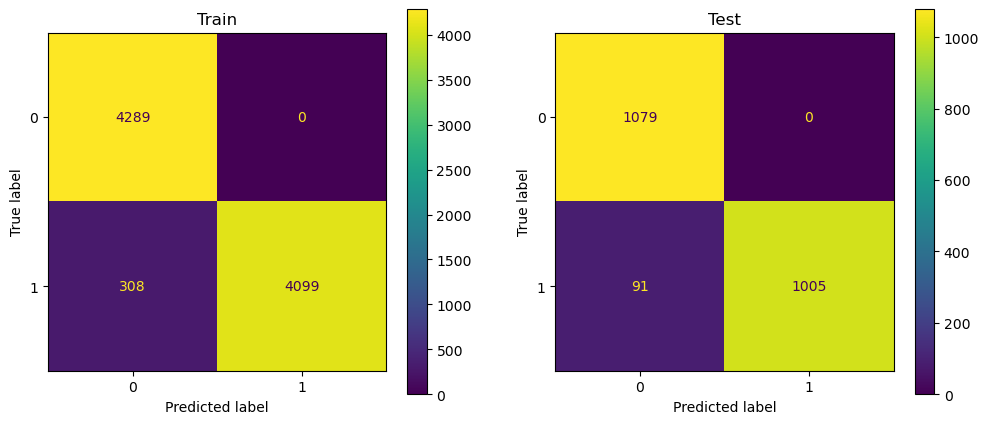

In [733]:
train_val_preds = best_model_rf.predict(X_train)
test_preds = best_model_rf.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds, labels=best_model_rf.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=best_model_rf.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds, labels=best_model_rf.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=best_model_rf.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [734]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds))
print("- Test:", accuracy_score(y_test, test_preds))
print("\nPrecision:")
print("- Train/Val:", precision_score(y_train, train_val_preds))
print("- Test:", precision_score(y_test, test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds))
print("- Test:", recall_score(y_test, test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds))
print("- Test:", f1_score(y_test, test_preds))

Accuracy:
- Train/Val: 0.9645814167433303
- Test: 0.9581609195402299

Precision:
- Train/Val: 1.0
- Test: 1.0

Recall:
- Train/Val: 0.9301111867483549
- Test: 0.916970802919708

F1:
- Train/Val: 0.9637902656948036
- Test: 0.9566872917658258


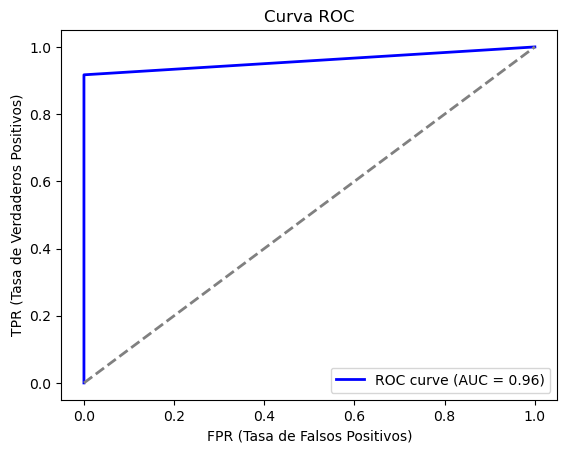

In [735]:
from sklearn.metrics import roc_curve, auc

# Calcular las tasas TPR y FPR
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Línea aleatoria
plt.xlabel('FPR (Tasa de Falsos Positivos)')
plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Segundo modelo (Árbol de decisión)

In [710]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ("classifier",  DecisionTreeClassifier(random_state=72))
]) 

param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, None],       
    'classifier__min_samples_split': [2, 5, 10],        
    'classifier__min_samples_leaf': [1, 2, 4],          
    'classifier__criterion': ['gini', 'entropy']  
}

In [711]:
grid_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)

In [712]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=72))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             verbose=1)

In [736]:
best_model_dt=grid_dt.best_estimator_

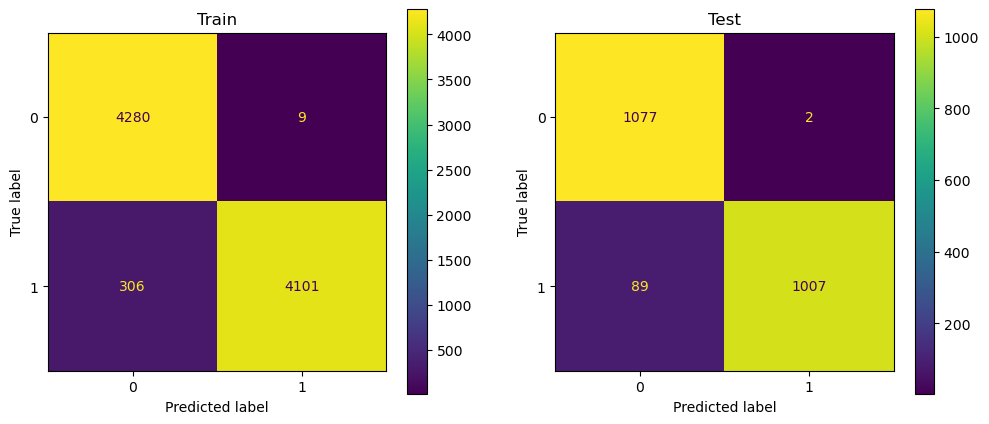

In [737]:
train_val_preds_dt = best_model_dt.predict(X_train)
test_preds_dt = best_model_dt.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds_dt, labels=best_model_dt.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=best_model_dt.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds_dt, labels=best_model_dt.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=best_model_dt.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [738]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds_dt))
print("- Test:", accuracy_score(y_test, test_preds_dt))
print("\nPrecision:")
print("- Train/Val:", precision_score(y_train, train_val_preds_dt))
print("- Test:", precision_score(y_test, test_preds_dt))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds_dt))
print("- Test:", recall_score(y_test, test_preds_dt))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds_dt))
print("- Test:", f1_score(y_test, test_preds_dt))

Accuracy:
- Train/Val: 0.9637764489420423
- Test: 0.9581609195402299

Precision:
- Train/Val: 0.9978102189781022
- Test: 0.998017839444995

Recall:
- Train/Val: 0.9305650102110279
- Test: 0.9187956204379562

F1:
- Train/Val: 0.9630151461782318
- Test: 0.956769596199525


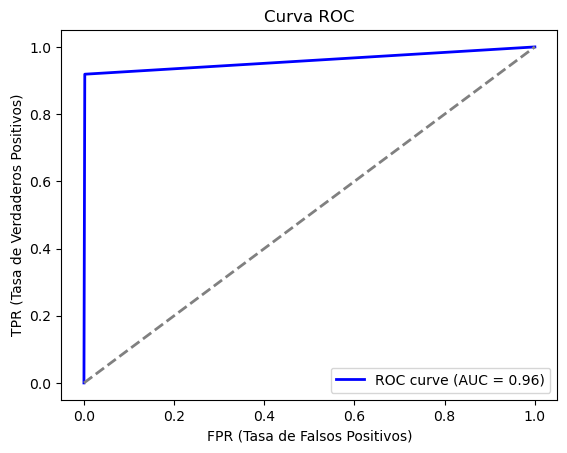

In [739]:
# Calcular las tasas TPR y FPR
fpr, tpr, thresholds = roc_curve(y_test, test_preds_dt)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Línea aleatoria
plt.xlabel('FPR (Tasa de Falsos Positivos)')
plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Testing

### A/B testing

In [740]:
control = best_model_rf
variant = best_model_dt

In [745]:
xtestA, xtestB, ytestA, ytestB = train_test_split(X_test[:-1], y_test[:-1], test_size=0.5)

In [746]:
ypred_control=control.predict(xtestA)
ypred_variant=variant.predict(xtestB)

In [747]:
acc_control = (ypred_control==ytestA).astype(int)
acc_variante = (ypred_variant==ytestB).astype(int)

print(acc_control.mean())
print(acc_variante.mean())

0.9613615455381784
0.954001839926403


In [748]:
from scipy import stats

t_stat, p_value = stats.ttest_rel(acc_control, acc_variante)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.8431619046318547, P-value: 0.39932356542238556


Al hacer el test de McNemar, nos damos cuenta que la probabilidad de que ambos modelos lo hagan igual es bastante alta (mucho mayor al 5%). Luego no podemos determinar que la variante es peor que el control.

### Test de McNemar para la matriz de confusión

In [722]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [723]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [749]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import mcnemar_tables

In [750]:
ypred_control=control.predict(X_test)
ypred_variant=variant.predict(X_test) 

In [751]:
tb = mcnemar_tables(y_test, 
                    ypred_control, 
                    ypred_variant)

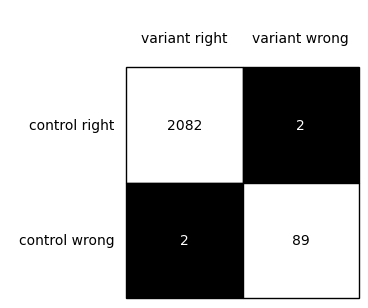

In [752]:
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['variant right', 'variant wrong'],
                        row_labels=['control right', 'control wrong'])
plt.show()

In [753]:
conf_matrix = confusion_matrix(ypred_control, ypred_variant)

# Perform McNemar's test
result = mcnemar(tb['model_0 vs model_1'], exact=False)
print("McNemar’s Test Results:")
print(f"Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

McNemar’s Test Results:
Statistic: 0.25
P-value: 0.6170750774519739


Al hacer el test de McNemar, nos damos cuenta que la probabilidad de que ambos modelos lo hagan igual es superior al umbral del 5%. Luego no podemos determinar si la variante es peor que el control.

### Test para las diferentes métricas

In [754]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=X_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.253, t-Statistic: -1.291


In [755]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=X_test, y=y_test, scoring='precision', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 1.000, t-Statistic: 0.000


In [756]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=X_test, y=y_test, scoring='recall', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.025, t-Statistic: -3.162


Como conclusión vemos que en términos de exactitud y precisión, ambos modelos no tienen diferencias significativas. Sin embargo, este test nos muestra que en términos de recall son suficientemente diferentes.

## Generación de los modelos

In [758]:
import joblib

joblib.dump(best_model_rf, './models/clasificadorRandomForest.joblib')
joblib.dump(best_model_dt, './models/clasificadorDecisionTree.joblib')

['./models/clasificadorDecisionTree.joblib']